# Reading product review data


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

In [2]:
# df = pd.read_csv("/content/drive/My Drive/amazon_baby.csv")
df = pd.read_csv("amazon_baby.csv")

In [3]:
#droping missing values
df = df.dropna(axis=0)


Most frequent items

In [4]:
frq = df["name"].value_counts()
print(frq)

Vulli Sophie the Giraffe Teether                                            779
Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L                         560
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision    558
Baby Einstein Take Along Tunes                                              545
Cloud b Twilight Constellation Night Light, Turtle                          517
                                                                           ... 
Uriage Cu-Zn+ Anti-Irritation Cream 40ml                                      1
Ferris wheel musical box 1845                                                 1
Lambs and Ivy Luv Bugs Lamp with Shade, Plum                                  1
SpongeBob No-Spill Cup 9 oz ~ BPA FREE                                        1
Munchkin Arm &amp; Hammer Baby Bottle Wash - 16 oz                            1
Name: name, Length: 32315, dtype: int64


Exploring Vullie Sophie(item)

In [5]:
giraffe_review = df[df["name"]=="Vulli Sophie the Giraffe Teether"]
len(giraffe_review)# 785 people reviewd the giraffe product


779

Exploring Vullie Sophie(item) Rating


In [6]:
print(giraffe_review["rating"].value_counts())

5    531
4     93
3     62
1     56
2     37
Name: rating, dtype: int64


Exploring all users ratings

In [7]:
rating = df["rating"].value_counts().unique()
print(rating)


[106265  33053  16705  15100  11261]


Creating a plot for all reviews

Text(0.5, 0, 'Ratings')

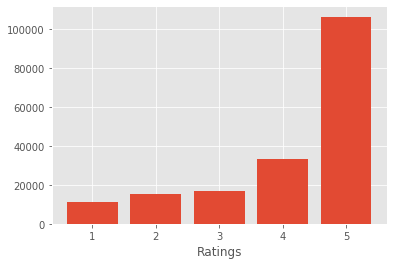

In [9]:
#Creating a plot for all reviews
from matplotlib import pyplot  as plt
%matplotlib inline
plt.style.use('ggplot')
df = df.sort_values(["rating"])
rat_unique = df["rating"].unique()
rat_unique = rat_unique[::-1]
height = rating
plt.bar(rat_unique,height)
plt.xlabel("Ratings")



Defining Positive/Negative Ratings





In [10]:
df["sentiment"] = df["rating"]>=4 #It primts 1 if the rating is greater than or equal to 4 and prints 0 othervise.
df["sentiment"] = df["sentiment"].astype(int)
y = df["sentiment"]

df

,name,review,rating,sentiment
29756,Mommy\'s Helper Toilet Seat Lid-Lok,Don\'t waste your money. My ten month old had ...,1,0
2175,Philips Avent 3 Pack 9oz Bottles,My baby tried these bottles and you could hear...,1,0
114296,Digital Connect Digital Baby Monitor - 1 Paren...,This is by far the worst baby monitor we have ...,1,0
117735,Tommee Tippee Closer to Nature Newborn Starter...,We have 6 month old twins and have used Tommee...,1,0
165396,Samsung SEW-3036WN Wireless Video Baby Monitor...,Receiver wouldn\'t work 10 feet from camera in...,1,0
...,...,...,...,...
160245,Carter\'s Child of Mine Baby\'s First Memory B...,I bought this for my second child and love the...,5,1
139776,Carter\'s Just One You Baby\'s Jungle Dots Fir...,"This book has tons of stuff (family tree, a sp...",5,1
139777,Carter\'s Just One You Baby\'s Jungle Dots Fir...,"Ordered 2 of these books for my boys, they are...",5,1
160248,Back Buddy Support Pillow,The manufacturer is missing a bet by advertisi...,5,1


Ploting the sentiment in pie chart

1    139318
0     43066
Name: sentiment, dtype: int64


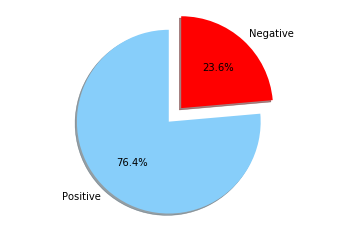

In [11]:
from matplotlib import pyplot as plt

count_Class = pd.value_counts(df["sentiment"], sort = True)
print(count_Class)
# Data to Plot
labels = 'Positive', 'Negative'
sizes = [count_Class[1], count_Class[0]]
colors =  ['lightskyblue', 'red', ]
explode = (0.1,0.1)

# Plot
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

CountVectorizer

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
a = df['review'].astype("str")
cv = CountVectorizer(stop_words='english',min_df=3)
cv = cv.fit_transform(a)



Using Cross Validation to find the algorithm that gives the best performance

In [15]:
import xgboost as xgb
from sklearn.ensemble import forest 
from sklearn import tree
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import statistics as stats
import warnings
warnings.filterwarnings("ignore")

xg = xgb.XGBClassifier()
fo =  forest.RandomForestClassifier()
tr = tree.DecisionTreeClassifier()
lo = linear_model.LogisticRegression()

xgb_score = cross_val_score(xg,cv,y)
ran_score = cross_val_score(fo,cv,y)
dtree_score = cross_val_score(tr,cv,y)
log_score = cross_val_score(lo,cv,y)

df_score = pd.DataFrame({"model":["xgboost","RandomForestClassifier","DecisionTreeClassifier","LogisticRegression"],"score":[stats.mean(xgb_score),stats.mean(ran_score),stats.mean(dtree_score),stats.mean(log_score)]})
print(df_score)

                    model     score
0                 xgboost  0.798211
1  RandomForestClassifier  0.805213
2  DecisionTreeClassifier  0.769942
3      LogisticRegression  0.839087


In [16]:
#Spltting the dataframe into training and testing sample of 80% and 20% respectively.
x_train,x_test,y_train,y_test = train_test_split(cv,y,test_size=0.20,random_state=0)

# Hyperparameter Tuning Using Using BayesSearchCV
Finding the hyperparameter values of a learning algorithm that produces the best result


In [17]:

# #!pip install scikit-optimize
# import numpy as np
# from skopt import BayesSearchCV
# from sklearn import linear_model
# from sklearn.model_selection import GridSearchCV
# model = linear_model.LogisticRegression()
# param =  {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],'C': [1.0,10],'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],'max_iter' : [100, 1000,5000] }
# Bayes_search = BayesSearchCV(model,param,scoring="accuracy")
# Bayes_search = Bayes_search.fit(x_train,y_train)
# print(Bayes_search.best_params_)



In [18]:
#training the model
from sklearn import linear_model
model = linear_model.LogisticRegression(multi_class="ovr",C=1.0)
model = model.fit(x_train,y_train)
pred = model.predict(x_test)
score = roc_auc_score(y_test,pred)
#testing the model
#user_review = ["Type your review here"]
#user_sen = cv.transform(user_review)
#pred = model.predict(user_sen)
score_df = pd.DataFrame({"sentiment":y_test,"predicted_sentiment":pred})
print(score_df)
#score #0.8009174323031545

        sentiment  predicted_sentiment
107508          1                    1
170769          1                    1
52370           1                    1
9335            0                    0
140974          1                    1
...           ...                  ...
101651          1                    1
67363           1                    1
118539          0                    1
177351          1                    1
117278          1                    1

[36477 rows x 2 columns]
